In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [3]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
                'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
                 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [4]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df = pd.concat([train_set,test_set])

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  wage_class      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [7]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.replace(' ?',np.nan,inplace=True)

In [10]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
wage_class           0
dtype: int64

In [11]:
df.wage_class.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [12]:
df = df.replace({' <=50K':0,' >50K':1,' <=50K.':0,' >50K.':1})

In [13]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [14]:
df['workclass'].fillna('0',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, '0'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

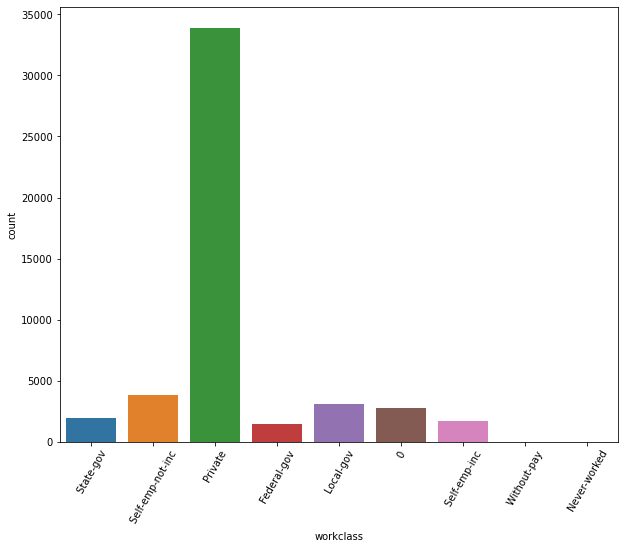

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

In [16]:
df['fnlwgt'].describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [17]:
df['fnlwgt'] = df['fnlwgt'].apply(lambda x :np.log1p(x))

In [18]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'Primary'
    else:
        return x

In [19]:
df['education'] = df['education'].apply(primary)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, 'Primary'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' Some-college'),
  Text(5, 0, ' Assoc-acdm'),
  Text(6, 0, ' Assoc-voc'),
  Text(7, 0, ' Doctorate'),
  Text(8, 0, ' Prof-school'),
  Text(9, 0, ' Preschool')])

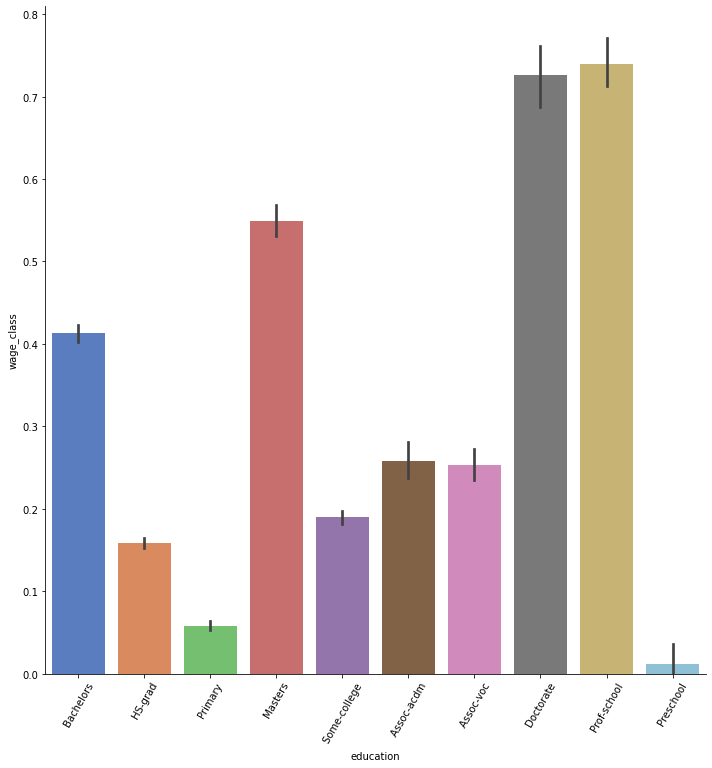

In [20]:
sns.catplot(x='education',y='wage_class',data=df,height=10,palette='muted',kind='bar')
plt.xticks(rotation=60)

In [21]:
df['marital_status'].value_counts()

 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital_status, dtype: int64

In [22]:
df['marital_status'].replace(' Married-AF-spouse', ' Married-civ-spouse',inplace=True)

In [23]:
df['occupation'].fillna('0',inplace=True)

In [24]:
df['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
0                     2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [25]:
df['occupation'].replace(' Armed-Forces','0',inplace=True)

In [26]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [27]:
def native(country):
    if country in [' United-States',' Canada']:
        return 'North_America'
    elif country in [' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',' Guatemala',' Haiti',' Nicaragua',' Trinadad&Tobago',' Honduras']:
        return 'Central_America' 
    elif country in [' Mexico',' Columbia',' Vietnam',' Peru',' Ecuador',' South',' Outlying-US(Guam-USVI-etc)']:
        return 'South_America'
    elif country in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
        return 'EU'
    elif country in [' India',' Iran',' China',' Japan',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan']:
        return 'Asian'
    else:
        return country

In [28]:
df['native_country'] = df['native_country'].apply(native)

<AxesSubplot:>

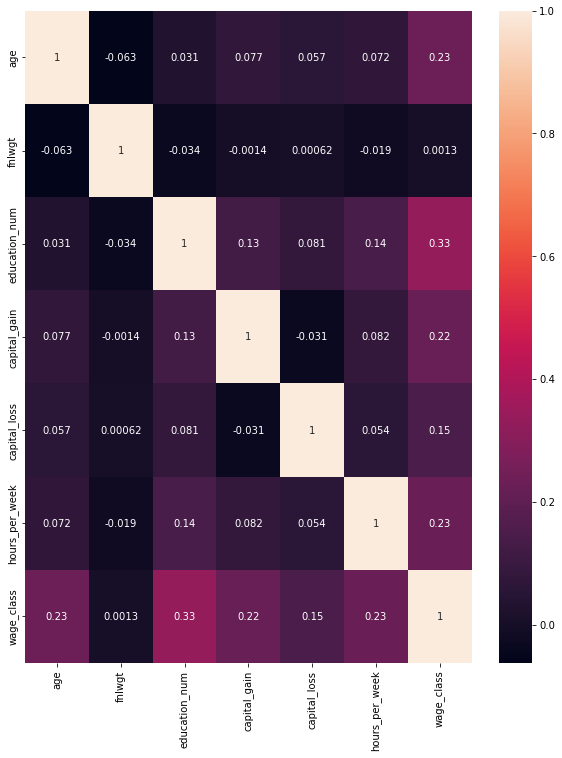

In [29]:
corr = df.corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr,annot=True)

In [30]:
X = df.drop(['wage_class'],axis=1)
y = df['wage_class']

In [31]:
X_d = pd.get_dummies(X)

In [32]:
X_d.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_Asian,native_country_Central_America,native_country_EU,native_country_North_America,native_country_South_America
0,39,11.258253,13,2174,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,11.330348,13,0,0,13,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,38,12.281398,9,0,0,40,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,53,12.366157,7,0,0,40,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
4,28,12.732013,13,0,0,40,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_d)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=101)

In [35]:
x_train.shape

(34189, 63)

In [36]:
params = [{ 'learning_rate':[0.01,0.001],
                        'max_depth': [3,5,10],
                        'n_estimators':[10,50,100,200]
                    }
                   ]

In [38]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
Xbc = XGBClassifier()
Gcv = GridSearchCV(Xbc,params,scoring='accuracy',cv=5,n_jobs=3,verbose=3)
Gcv.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [39]:
Gcv.best_params_

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}

In [40]:
XBC = XGBClassifier(learning_rate=0.01,max_depth=10,n_estimators=200)
XBC.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [41]:
XBC.score(x_test,y_test)

0.8654882959120999

In [42]:
y_pred = XBC.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(f'Accuracy Score:{accuracy_score(y_test,y_pred)}')
print('*'*50)
print(f'Confusion Matrix:{confusion_matrix(y_test,y_pred)}')
print('*'*50)
print(f'Classification Report: {classification_report(y_test,y_pred)}')

Accuracy Score:0.8654882959120999
**************************************************
Confusion Matrix:[[10540   560]
 [ 1411  2142]]
**************************************************
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.95      0.91     11100
           1       0.79      0.60      0.68      3553

    accuracy                           0.87     14653
   macro avg       0.84      0.78      0.80     14653
weighted avg       0.86      0.87      0.86     14653

